In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsn

In [3]:
from tensorflow.keras.datasets import cifar10

In [7]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [8]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [9]:
x_train.shape

(50000, 32, 32, 3)

In [10]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [11]:
x_train[0].shape

(32, 32, 3)

In [14]:
x_train.max()

255

In [15]:
x_train=x_train/255
x_test=x_test/255

In [16]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_train_cat=to_categorical(y_train,num_classes=10)

In [19]:
y_test_cat=to_categorical(y_test,num_classes=10)

In [20]:
from tensorflow.keras.models import Sequential

In [23]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [53]:
sq=Sequential()

In [54]:
sq.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
sq.add(MaxPool2D(pool_size=(2,2)))
sq.add(Conv2D(filters=32,input_shape=(32,32,3),kernel_size=(4,4),activation='relu'))
sq.add(MaxPool2D(pool_size=(2,2)))
sq.add(Flatten())
sq.add(Dense(256,activation='relu'))
sq.add(Dense(10,activation='softmax'))
sq.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [56]:
from tensorflow.keras.callbacks import EarlyStopping
stop=EarlyStopping(monitor='val_loss',mode='min',patience=2)

In [57]:
sq.fit(x_train,y_train_cat,epochs=25,validation_data=(x_test,y_test_cat),callbacks=stop)

Epoch 1/25
1563/1563 [==============================] - 40s 26ms/step - loss: 1.4517 - accuracy: 0.4770 - val_loss: 1.2373 - val_accuracy: 0.5581
Epoch 2/25
1563/1563 [==============================] - 40s 25ms/step - loss: 1.1265 - accuracy: 0.6029 - val_loss: 1.0625 - val_accuracy: 0.6237
Epoch 3/25
1563/1563 [==============================] - 40s 25ms/step - loss: 0.9753 - accuracy: 0.6590 - val_loss: 1.0031 - val_accuracy: 0.6489
Epoch 4/25
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8683 - accuracy: 0.6968 - val_loss: 0.9728 - val_accuracy: 0.6634
Epoch 5/25
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7771 - accuracy: 0.7284 - val_loss: 0.9480 - val_accuracy: 0.6744
Epoch 6/25
1563/1563 [==============================] - 51s 33ms/step - loss: 0.6917 - accuracy: 0.7580 - val_loss: 0.9641 - val_accuracy: 0.6772
Epoch 7/25
1563/1563 [==============================] - 52s 33ms/step - loss: 0.6134 - accuracy: 0.7849 - val_loss: 0.9580 -

In [58]:
df=pd.DataFrame(sq.history.history)

In [59]:
df

,loss,accuracy,val_loss,val_accuracy
0,1.451722,0.47696,1.237311,0.5581
1,1.126522,0.60288,1.062501,0.6237
2,0.975329,0.65896,1.003087,0.6489
3,0.868268,0.69678,0.972779,0.6634
4,0.777075,0.72836,0.947991,0.6744
5,0.691697,0.75800,0.964111,0.6772
6,0.613405,0.78492,0.957977,0.6873


<AxesSubplot:>

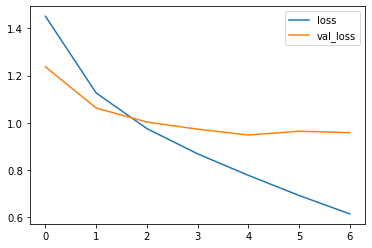

In [60]:
df[['loss','val_loss']].plot()

In [64]:
sq.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [65]:
sq.evaluate(x_test,y_test_cat)

313/313 [==============================] - 2s 6ms/step - loss: 0.9580 - accuracy: 0.6873


[0.9579773545265198, 0.6873000264167786]

In [67]:
pred=sq.predict_classes(x_test)

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1000
           1       0.84      0.78      0.81      1000
           2       0.59      0.61      0.60      1000
           3       0.52      0.44      0.48      1000
           4       0.59      0.66      0.62      1000
           5       0.51      0.67      0.58      1000
           6       0.79      0.76      0.77      1000
           7       0.77      0.70      0.73      1000
           8       0.83      0.76      0.79      1000
           9       0.80      0.75      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [70]:
confusion_matrix(y_test,pred)

array([[742,  21,  72,  28,  34,  15,  12,   8,  45,  23],
       [ 29, 784,  17,  12,  13,  10,  14,   2,  33,  86],
       [ 57,   4, 607,  45,  99,  98,  48,  24,  10,   8],
       [ 19,   8,  78, 443,  88, 262,  48,  30,  11,  13],
       [ 16,   3,  72,  51, 661,  73,  37,  68,  12,   7],
       [ 10,   2,  53, 132,  56, 665,  27,  47,   1,   7],
       [  6,   6,  56,  60,  50,  40, 762,  10,   4,   6],
       [  8,   3,  34,  35,  88, 103,   7, 702,   4,  16],
       [102,  27,  24,  22,  17,  17,   6,   3, 757,  25],
       [ 47,  70,  20,  19,  14,  18,   8,  17,  37, 750]], dtype=int64)

<AxesSubplot:>

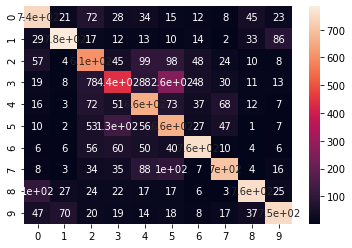

In [75]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [80]:
x_train[0].shape

(32, 32, 3)

In [82]:
sq.predict_classes(x_train[0].reshape(1,32,32,3))

array([6], dtype=int64)

In [84]:
#google cifar10 label nanmes
#6 is frog

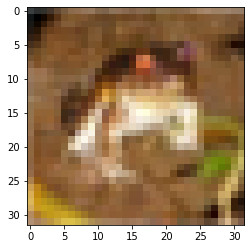

In [85]:
plt.imshow(x_train[0])